# <b><u>Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

# Name :- **Suhail Moidin**

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

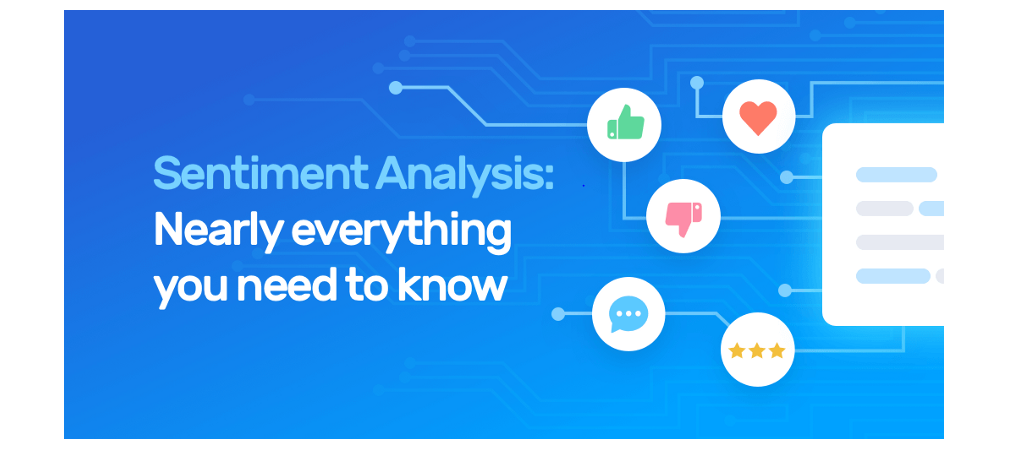

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

# Workflow

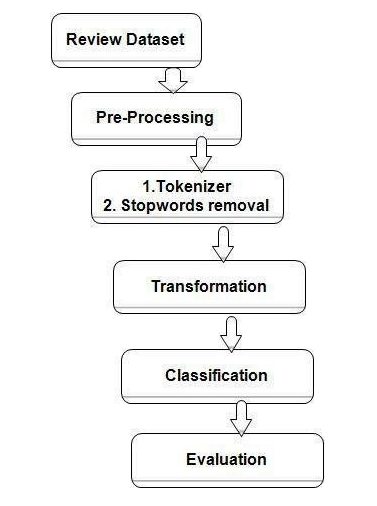

#**1.Lets Invite Some Libraries.**

In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200) 
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir_path = 'coronaTweets.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')

# **2. Reviewing Our Dataset**

In [ ]:
df.head()

UserName  ...           Sentiment
0      3799  ...             Neutral
1      3800  ...            Positive
2      3801  ...            Positive
3      3802  ...            Positive
4      3803  ...  Extremely Negative

[5 rows x 6 columns]

In [ ]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# There 41157 rows and 6 columns in our database
df.shape

(41157, 6)

In [ ]:
# Names Of columns in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# All tweets came only from March and April month of 2020.
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# There are 12220 unique locations from where the tweets came.
df['Location'].value_counts()

London                    540
United States             528
London, England           520
New York, NY              395
Washington, DC            373
                         ... 
Bombay, India               1
Wading River, New York      1
1 mile high (Denver)        1
South West                  1
Tel-Aviv                    1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# There are 5 unique sentiment types in our dataset
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

# Going deeper into tweet and sentiment.

In [ ]:
df[df['Sentiment']=='Extremely Negative']

UserName  ...           Sentiment
4          3803  ...  Extremely Negative
20         3819  ...  Extremely Negative
27         3826  ...  Extremely Negative
29         3828  ...  Extremely Negative
42         3841  ...  Extremely Negative
...         ...  ...                 ...
41115     44914  ...  Extremely Negative
41128     44927  ...  Extremely Negative
41130     44929  ...  Extremely Negative
41133     44932  ...  Extremely Negative
41153     44952  ...  Extremely Negative

[5481 rows x 6 columns]

In [ ]:
df[df['Sentiment']=='Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

In [ ]:
df[df['Sentiment']=='Extremely Negative'].loc[41153,'OriginalTweet']

'Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?'

In [ ]:
df[df['Sentiment']=='Negative']

UserName  ...  Sentiment
9          3808  ...   Negative
24         3823  ...   Negative
26         3825  ...   Negative
28         3827  ...   Negative
30         3829  ...   Negative
...         ...  ...        ...
41127     44926  ...   Negative
41131     44930  ...   Negative
41147     44946  ...   Negative
41149     44948  ...   Negative
41156     44955  ...   Negative

[9917 rows x 6 columns]

In [ ]:
df[df['Sentiment']=='Negative'].loc[41149,'OriginalTweet']

'Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .'

In [ ]:
df[df['Sentiment']=='Neutral']

UserName  ...  Sentiment
0          3799  ...    Neutral
7          3806  ...    Neutral
10         3809  ...    Neutral
16         3815  ...    Neutral
17         3816  ...    Neutral
...         ...  ...        ...
41141     44940  ...    Neutral
41143     44942  ...    Neutral
41144     44943  ...    Neutral
41152     44951  ...    Neutral
41155     44954  ...    Neutral

[7713 rows x 6 columns]

In [ ]:
df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [ ]:
df[df['Sentiment']=='Neutral'].loc[16,'OriginalTweet']

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [ ]:
df[df['Sentiment']=='Positive']

UserName  ...  Sentiment
1          3800  ...   Positive
2          3801  ...   Positive
3          3802  ...   Positive
5          3804  ...   Positive
6          3805  ...   Positive
...         ...  ...        ...
41140     44939  ...   Positive
41145     44944  ...   Positive
41146     44945  ...   Positive
41150     44949  ...   Positive
41154     44953  ...   Positive

[11422 rows x 6 columns]

In [ ]:
df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [ ]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

In [ ]:
df[df['Sentiment']=='Extremely Positive']

UserName  ...           Sentiment
11         3810  ...  Extremely Positive
12         3811  ...  Extremely Positive
18         3817  ...  Extremely Positive
22         3821  ...  Extremely Positive
23         3822  ...  Extremely Positive
...         ...  ...                 ...
41137     44936  ...  Extremely Positive
41138     44937  ...  Extremely Positive
41142     44941  ...  Extremely Positive
41148     44947  ...  Extremely Positive
41151     44950  ...  Extremely Positive

[6624 rows x 6 columns]

In [ ]:
df[df['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
df[df['Sentiment']=='Extremely Positive'].loc[22,'OriginalTweet']

'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult'

In [ ]:
pd.isnull(df["Sentiment"])


0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

# Looking For Null Values

Only Location column contains 28% null values. But this column is not useful for our sentiment analysis.Hence we will neglect these null values.

In [ ]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

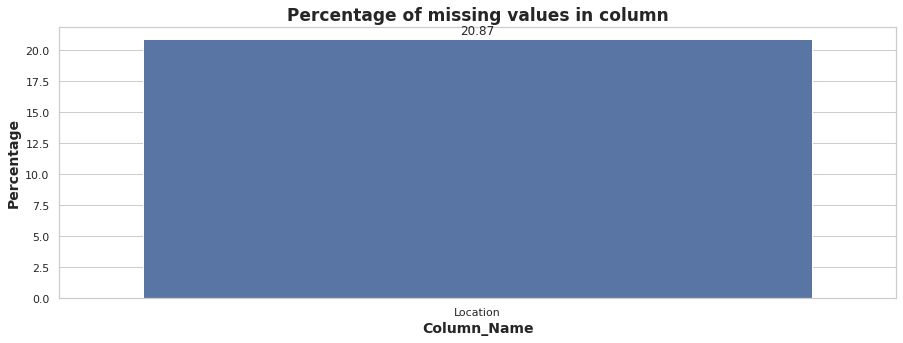

In [ ]:
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


# Heat Map for missing values

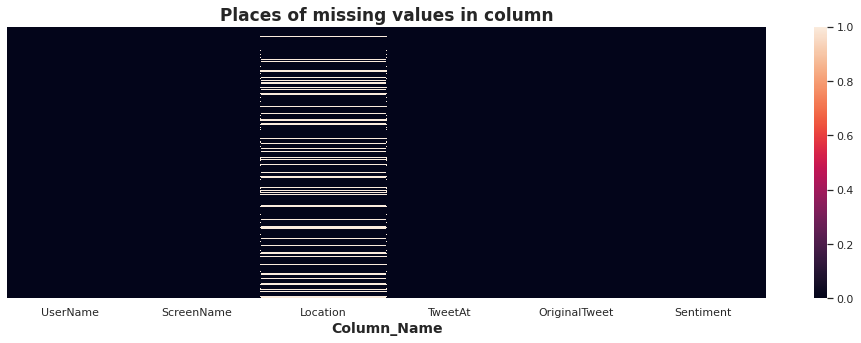

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

# Unique Values In Each Feature Coulmn

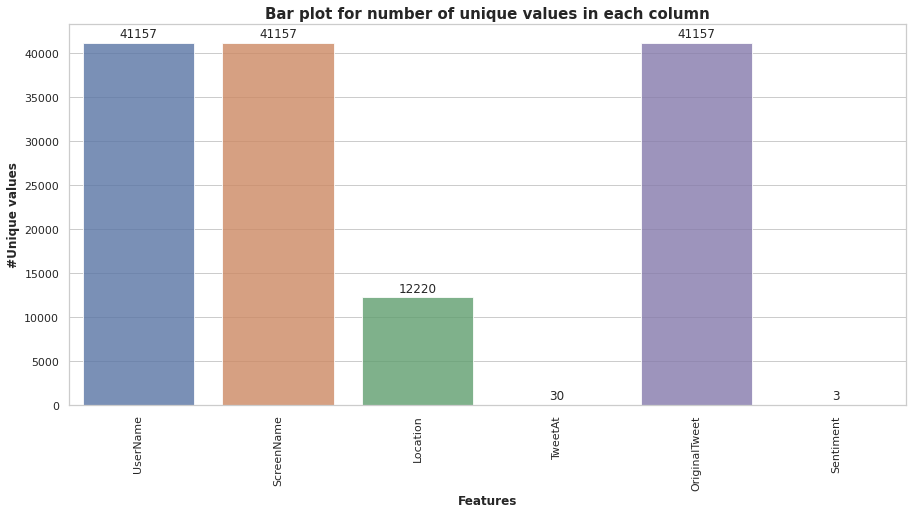

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Plot Of Top 15 Locations Of Tweet.

In [ ]:
loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [ ]:
import plotly.graph_objects as go


In [ ]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

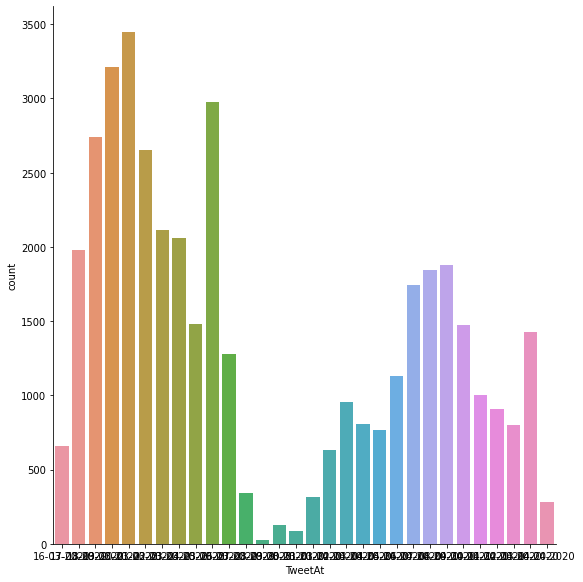

In [ ]:
sns.catplot("TweetAt", data=df, kind="count", height=8)

# Top 10 locations of tweet

In [ ]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [ ]:
Top_Location_Of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

Location  Location_Count
0           London             540
1    United States             528
2  London, England             520
3     New York, NY             395
4   Washington, DC             373
5   United Kingdom             337
6  Los Angeles, CA             281
7            India             268
8               UK             232
9        Australia             225

[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia')]

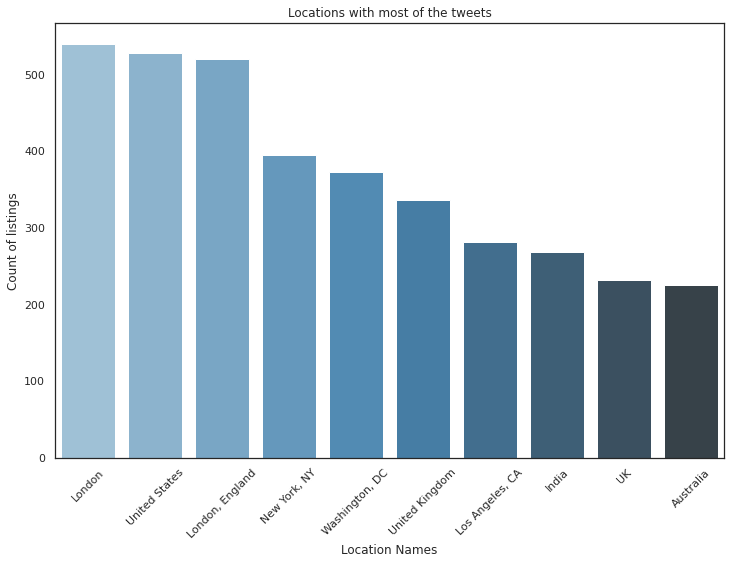

In [ ]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Sentiments Countplot

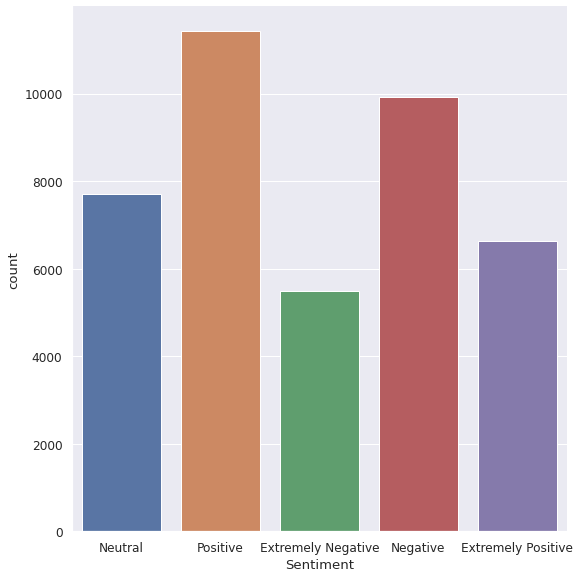

In [ ]:
sns.set(font_scale=1.1)
sns.catplot("Sentiment", data=df, kind="count", height=8)

In [ ]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# Data Preprocessing

**A) Removing @user**

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                          https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
1      3800  ...  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...

[2 rows x 7 columns]

**REMOVED HTTP AND URLS FROM TWEET**

In [ ]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df.head(3)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2      3801  ...                                                                                             Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak 

[3 rows x 7 columns]

**B) Removing Punctuations, Numbers, and Special Characters**

In [ ]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
df.head(5)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...
2      3801  ...                                                                                                  Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID outbreak 
3      3802  ...  My food stock is not the only one which is empty PLEASE don t panic THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need Stay calm stay safe #COVID france #COVID #COVID #co...
4      3803  ...  Me ready to go at supermarket during the #COVID outbreak Not because I m paranoid but because my food stock is litteraly empty The #coronavirus is a serious thing but please don t panic It causes ...

[5 rows x 7 columns]

**C) Removing Short Words**

In [ ]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...

[2 rows x 7 columns]

**D) Tokenization**

In [ ]:
# create new variable tokenized tweet 
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...

[2 rows x 7 columns]

**E) Stemming**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advice Talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular med...

[2 rows x 7 columns]

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
df['Tweet']  = tokenized_tweet


In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                               Tweet
0      3799  ...                                                                                                                                                                                                    
1      3800  ...  advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order

[2 rows x 7 columns]

# **Story Generation and Visualization from Tweets**

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [ ]:
df.head(2)

UserName  ...                                                                                                                                                                                                    Tweet
0      3799  ...                                                                                                                                                                                                         
1      3800  ...  advic talk to your neighbour famili to exchang phone number creat contact list with phone number of neighbour school employ chemist GP set up onlin shop account if poss adequ suppli of regular med...

[2 rows x 7 columns]

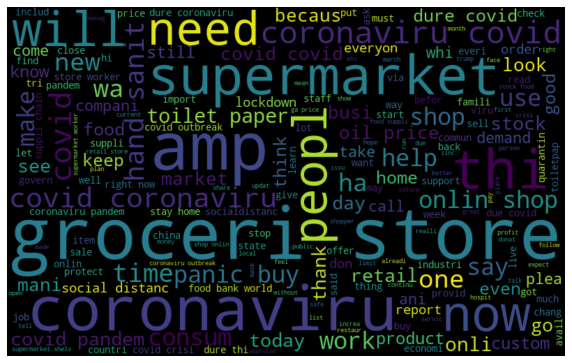

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

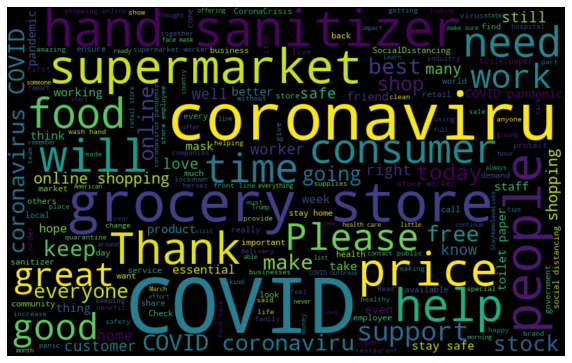

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

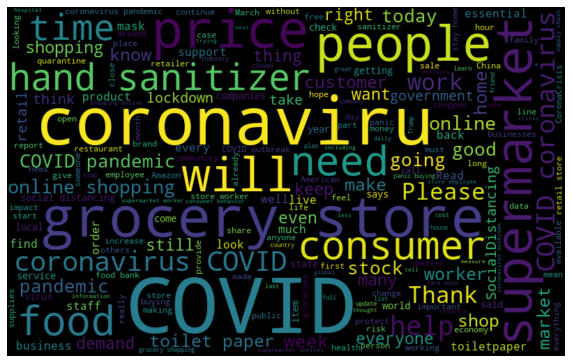

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

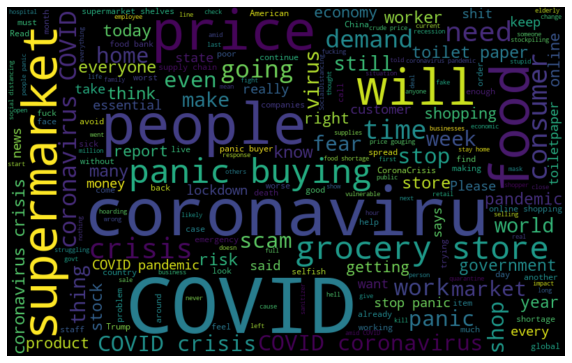

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

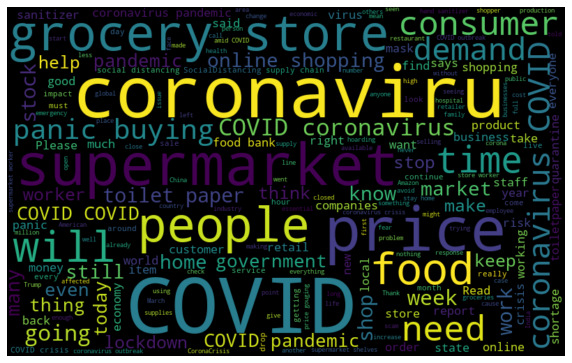

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

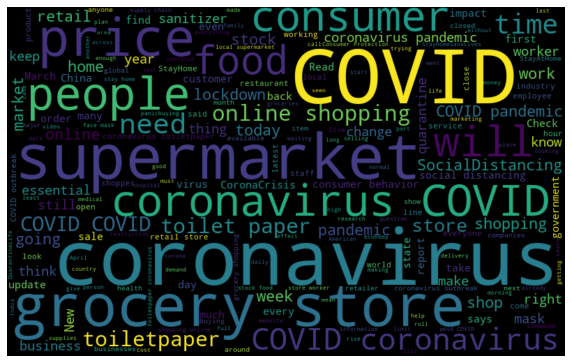

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

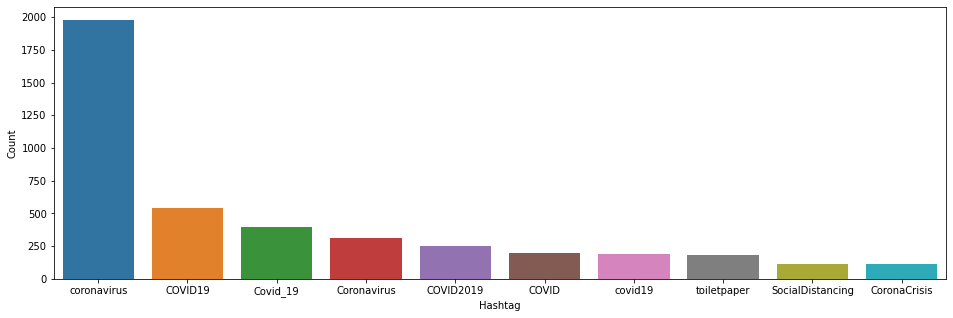

In [ ]:
# making frequency distribution top 10 Extremely Positive hashtags
a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

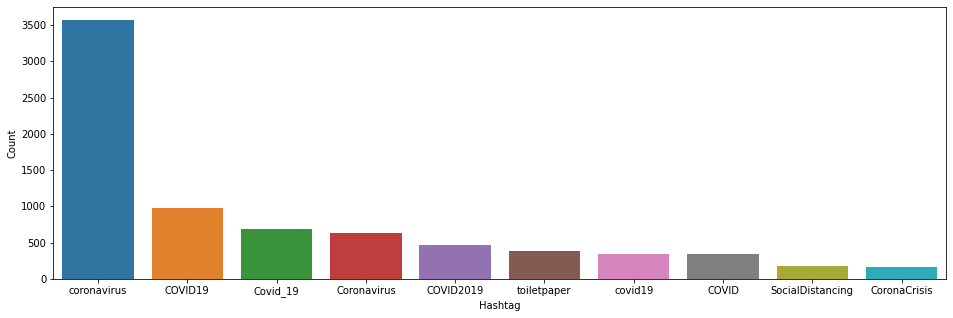

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

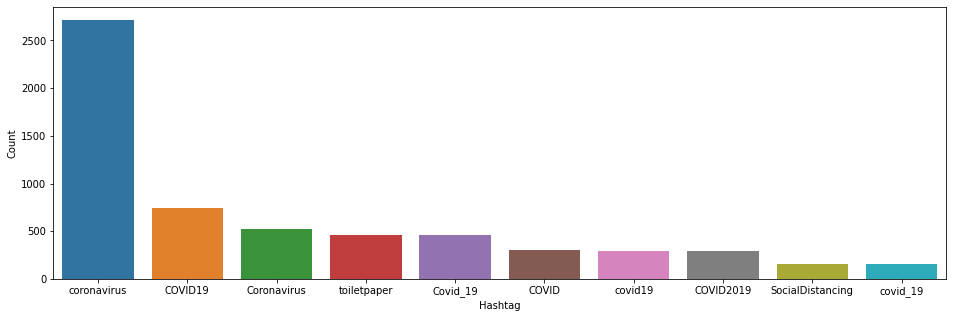

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

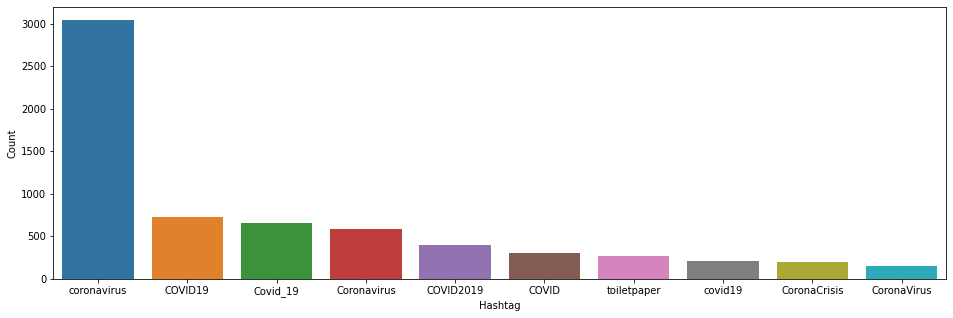

In [ ]:
# making frequency distribution top 10 Positive hashtags
a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

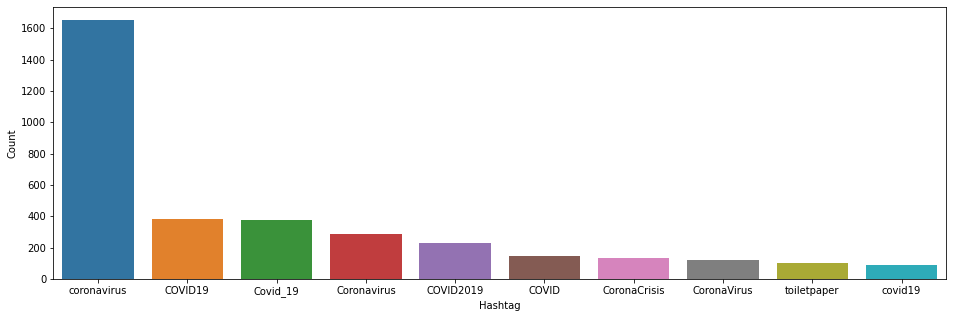

In [ ]:
# making frequency distribution top 10 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

In [ ]:
new_df = df[['Tweet','Sentiment']]

In [ ]:
new_df.head()

Tweet           Sentiment
0                                                                                                                                                                                                                      Neutral
1       advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order            Positive
2                                                                                                                   coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak            Positive
3  food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confi...            Positive
4  readi supermarket dure the #covid outbreak not becaus paranoid but becaus food stock litterali empti the #coronaviru seriou thing but pleas don panic caus shortag #coronavirusfr #restezchezv #stay...  Extremely Negative

In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

**Converting into lower case**

In [ ]:
#new_df["Tweet"] = new_df["Tweet"].str.lower()#.str.split()

In [ ]:
#new_df.head(5)

Tweet           Sentiment
0    NaN             Neutral
1    NaN            Positive
2    NaN            Positive
3    NaN            Positive
4    NaN  Extremely Negative

**Removing Stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                                                             []
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, r,  , f, l,  , e, x, c, h, n, g,  , p, h, n, e,  , n, u, b, e, r,  , c, r, e,  , c, n, c,  , l,  , w, h,  , p, h, n, e,  , n, u, b, e, r,  , n, e, g, ...
2                                                            [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, h,  , g, v, e,  , e, l, e, r, l,  , b, l,  , e, c,  , h, p,  , h, u, r,  ,  , c, v,  , u, b, r, e, k]
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e,  , w, h, c, h,  , e, p,  , p, l, e,  , n,  , p, n, c,  , h, e, r, e,  , w, l, l,  , e, n, u, g, h,  , f,  , f, r,  , e, v, e, r, n,  , u,  , n,  , k, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , h, e,  , #, c, v,  , u, b, r, e, k,  , n,  , b, e, c, u,  , p, r, n,  , b, u,  , b, e, c, u,  , f,  , c, k,  

In [ ]:
new_df.head(6)

Tweet           Sentiment
0                                                                                                                                                                                                                      Neutral
1       advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order            Positive
2                                                                                                                   coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak            Positive
3  food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confi...            Positive
4  readi supermarket dure the #covid outbreak not becaus paranoid but becaus food stock litterali empti the #coronaviru seriou thing but pleas don panic caus shortag #coronavirusfr #restezchezv #stay...  Extremely Negative
5                               news the region first confirm covid case came out sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper and other good report            Positive

In [ ]:
new_df.shape

(41157, 2)

In [ ]:
new_df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [ ]:
new_df.head(7)

Tweet           Sentiment
0                                                                                                                                                                                                                      Neutral
1       advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order            Positive
2                                                                                                                   coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak            Positive
3  food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confi...            Positive
4  readi supermarket dure the #covid outbreak not becaus paranoid but becaus food stock litterali empti the #coronaviru seriou thing but pleas don panic caus shortag #coronavirusfr #restezchezv #stay...  Extremely Negative
5                               news the region first confirm covid case came out sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper and other good report            Positive
6                                                                                               cashier groceri store wa share hi insight #covid prove hi credibl comment civic class know what talk about            Positive

# Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 27089)
X_train.shape :  (8232, 27089)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.6931511009870919
Validation accuracy Score :  0.47947035957240036
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.59      0.47       736
Extremely Positive       0.40      0.58      0.47       907
          Negative       0.52      0.43      0.47      2398
           Neutral       0.34      0.67      0.45       786
          Positive       0.62      0.42      0.50      3405

          accuracy                           0.48      8232
         macro avg       0.46      0.54      0.47      8232
      weighted avg       0.52      0.48      0.48      8232



# Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8288838268792711
Validation accuracy Score :  0.5726433430515063
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.62      0.65      1210
Extremely Positive       0.68      0.65      0.67      1396
          Negative       0.45      0.50      0.48      1785
           Neutral       0.75      0.59      0.66      1963
          Positive       0.44      0.54      0.48      1878

          accuracy                           0.57      8232
         macro avg       0.60      0.58      0.59      8232
      weighted avg       0.59      0.57      0.58      8232



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9958997722095672
Validation accuracy Score :  0.5659620991253644
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.67      0.50       643
Extremely Positive       0.36      0.72      0.48       665
          Negative       0.55      0.53      0.54      2054
           Neutral       0.76      0.61      0.68      1936
          Positive       0.65      0.51      0.57      2934

          accuracy                           0.57      8232
         macro avg       0.54      0.61      0.55      8232
      weighted avg       0.61      0.57      0.57      8232



# Extreme Gradient Boosting ( For Multiclass Classification)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.5047835990888383
Validation accuracy Score :  0.4868804664723032
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.63      0.48       677
Extremely Positive       0.41      0.66      0.51       825
          Negative       0.38      0.49      0.43      1561
           Neutral       0.60      0.47      0.53      1974
          Positive       0.59      0.42      0.49      3195

          accuracy                           0.49      8232
         macro avg       0.48      0.53      0.49      8232
      weighted avg       0.52      0.49      0.49      8232



# Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.8993773728170084
Validation accuracy Score :  0.6072643343051506
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.71      0.57       738
Extremely Positive       0.53      0.78      0.63       902
          Negative       0.58      0.55      0.56      2082
           Neutral       0.71      0.64      0.67      1718
          Positive       0.67      0.55      0.61      2792

          accuracy                           0.61      8232
         macro avg       0.59      0.65      0.61      8232
      weighted avg       0.62      0.61      0.61      8232



# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.8860744115413819
Validation accuracy Score :  0.6179543245869776
                    precision    recall  f1-score   support

Extremely Negative       0.62      0.68      0.65       999
Extremely Positive       0.62      0.71      0.66      1147
          Negative       0.54      0.56      0.55      1896
           Neutral       0.72      0.64      0.68      1744
          Positive       0.62      0.58      0.59      2446

          accuracy                           0.62      8232
         macro avg       0.62      0.63      0.63      8232
      weighted avg       0.62      0.62      0.62      8232



# CATBOOST MODEL (For Multiclass Classification)

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 65.8MB 71kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.6703720577069097
Validation accuracy Score :  0.6203838678328474
                    precision    recall  f1-score   support

Extremely Negative       0.54      0.70      0.61       843
Extremely Positive       0.56      0.76      0.65       974
          Negative       0.53      0.58      0.56      1813
           Neutral       0.81      0.60      0.69      2058
          Positive       0.64      0.58      0.61      2544

          accuracy                           0.62      8232
         macro avg       0.62      0.65      0.62      8232
      weighted avg       0.64      0.62      0.62      8232



# All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
6                    CatBoost       0.620384
1         Logistic Regression       0.617954
0     Support Vector Machines       0.607264
4  Stochastic Gradient Decent       0.572643
2               Random Forest       0.565962
5                     XGBoost       0.486880
3                 Naive Bayes       0.479470

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [ ]:
new_df.head()

Tweet           Sentiment
0                                                                                                                                                                                                                      Neutral
1       advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order            Positive
2                                                                                                                   coronaviru australia woolworth give elderli disabl dedic shop hour amid covid outbreak            Positive
3  food stock not the onli one which empti pleas don panic there will enough food for everyon you not take more than you need stay calm stay safe #covid franc #covid #covid #coronaviru #confin #confi...            Positive
4  readi supermarket dure the #covid outbreak not becaus paranoid but becaus food stock litterali empti the #coronaviru seriou thing but pleas don panic caus shortag #coronavirusfr #restezchezv #stay...  Extremely Negative

In [ ]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [ ]:
CATBOOST.head(2)

Tweet Sentiment
0                                                                                                                                                                                                       Neutral
1  advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order  Positive

In [ ]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',1) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',0) 
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0) 


In [ ]:
CATBOOST.head(2)

Tweet  Sentiment
0                                                                                                                                                                                                              1
1  advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order          1

In [ ]:
CATBOOST['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [ ]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                                                             []
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, r,  , f, l,  , e, x, c, h, n, g,  , p, h, n, e,  , n, u, b, e, r,  , c, r, e,  , c, n, c,  , l,  , w, h,  , p, h, n, e,  , n, u, b, e, r,  , n, e, g, ...
2                                                            [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, h,  , g, v, e,  , e, l, e, r, l,  , b, l,  , e, c,  , h, p,  , h, u, r,  ,  , c, v,  , u, b, r, e, k]
3        [f,  , c, k,  , n,  , h, e,  , n, l,  , n, e,  , w, h, c, h,  , e, p,  , p, l, e,  , n,  , p, n, c,  , h, e, r, e,  , w, l, l,  , e, n, u, g, h,  , f,  , f, r,  , e, v, e, r, n,  , u,  , n,  , k, ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, r, e,  , h, e,  , #, c, v,  , u, b, r, e, k,  , n,  , b, e, c, u,  , p, r, n,  , b, u,  , b, e, c, u,  , f,  , c, k,  

In [ ]:
CATBOOST.head(2)

Tweet  Sentiment
0                                                                                                                                                                                                              1
1  advic talk your neighbour famili exchang phone number creat contact list with phone number neighbour school employ chemist set onlin shop account poss adequ suppli regular med but not over order          1

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 27205)
X_train.shape :  (8232, 27205)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8585573272589218
Validation accuracy Score :  0.7916666666666666
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2899
           1       0.85      0.82      0.84      5333

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9985725132877753
Validation accuracy Score :  0.8302964042759962
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      2635
           1       0.91      0.84      0.87      5597

    accuracy                           0.83      8232
   macro avg       0.80      0.83      0.81      8232
weighted avg       0.84      0.83      0.83      8232



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.937798025816249
Validation accuracy Score :  0.8594509232264335
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2791
           1       0.92      0.87      0.89      5441

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.86      0.86      0.86      8232



# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.8840091116173121
Validation accuracy Score :  0.8521622934888241
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      2593
           1       0.93      0.85      0.89      5639

    accuracy                           0.85      8232
   macro avg       0.83      0.85      0.84      8232
weighted avg       0.86      0.85      0.86      8232



# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.7434776006074412
Validation accuracy Score :  0.7395529640427599
              precision    recall  f1-score   support

           0       0.38      0.84      0.52      1382
           1       0.96      0.72      0.82      6850

    accuracy                           0.74      8232
   macro avg       0.67      0.78      0.67      8232
weighted avg       0.86      0.74      0.77      8232



# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9569020501138952
Validation accuracy Score :  0.8456025267249757
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      2467
           1       0.94      0.84      0.88      5765

    accuracy                           0.85      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.86      0.85      0.85      8232



# **Winner Model:**

# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9350949126803341
Validation accuracy Score :  0.8624878522837707
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2882
           1       0.91      0.88      0.89      5350

    accuracy                           0.86      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[10982  1336]
 [  801 19806]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

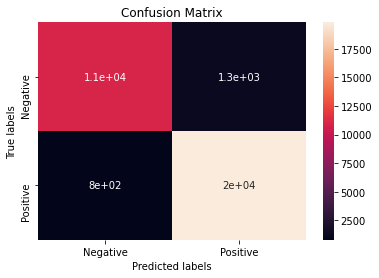

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.8624878522837707


In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.851170918004085


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.8624878522837707


In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.8467232495765105

In [ ]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.78      0.81      3080\n           1       0.88      0.91      0.89      5152\n\n    accuracy                           0.86      8232\n   macro avg       0.86      0.85      0.85      8232\nweighted avg       0.86      0.86      0.86      8232\n'

In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[2415,  665],
       [ 467, 4685]])

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.862488
1         Logistic Regression       0.859451
6                    CatBoost       0.852162
0     Support Vector Machines       0.845603
2               Random Forest       0.830296
3                 Naive Bayes       0.791667
5                     XGBoost       0.739553